Define Muskingum coefficients Parameters

In [101]:
K1 = 7.722
X1 = 0.3
delta_t = 15*60
alpha1 = (delta_t-2*K1*X1)/(2*K1*(1-X1)+delta_t)
beta1 = (delta_t+2*K1*X1)/(2*K1*(1-X1)+delta_t)
xi1 = (2*K1*(1-X1)-delta_t)/(2*K1*(1-X1)+delta_t)

K2 = 7.3317
X2 = 0.5
delta_t = 15*60
alpha2 = (delta_t-2*K2*X2)/(2*K2*(1-X2)+delta_t)
beta2 = (delta_t+2*K1*X1)/(2*K2*(1-X2)+delta_t)
xi2 = (2*K2*(1-X1)-delta_t)/(2*K2*(1-X2)+delta_t)

K3 = 7.722
X3 = 0.2
delta_t = 15*60
alpha3 = (delta_t-2*K2*X2)/(2*K2*(1-X2)+delta_t)
beta3 = (delta_t+2*K2*X2)/(2*K2*(1-X2)+delta_t)
xi3 = (2*K2*(1-X2)-delta_t)/(2*K2*(1-X2)+delta_t)

Define state space system Matrices

In [102]:
#Define the matrices
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
B_I = np.array([0,0,0,0,0,0,beta1,beta2,0]).reshape(3,3)
X_I = np.array([0,0,0,0,0,0,xi1,xi2,0]).reshape(3,3)
B_O = np.array([beta1,0,0,0,beta2,0,alpha3*beta1,alpha3*beta2,beta3]).reshape(3,3)
X_O = np.array([xi1,0,0,0,xi2,0,alpha3*xi1,alpha3*xi2,xi3]).reshape(3,3)
P_I = np.array([1,0,0,0,1,0,alpha1,alpha2,1]).reshape(3,3)
P_O = np.array([alpha1,0,0,0,alpha2,0,alpha3*alpha1,alpha3*alpha2,alpha3]).reshape(3,3)

Create block Matrices

In [103]:
df = pd.read_csv('Total_inflow.csv')

mat_6x6 = np.block([[B_I,X_I],[B_O,X_O]])  # Creating 6x6 Matrix

mat_6x3 = np.block([[P_I],[P_O]])        # Creating 6 * 3 matrix

I_intial=np.array([0,0,0]).reshape(3,1)  # Intializing I matrix

O_intial=np.array([0,0,0]).reshape(3,1)    # Initializing O matrix

IO_mat_6x1 = np.block([[I_intial],[O_intial]])  # Creating a block matrix

In [104]:
eig = np.linalg.eig(mat_6x6)
eig

(array([-0.98383899,  0.        , -0.97626115,  0.        , -0.98060678,
         0.        ]),
 array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         7.00992932e-001, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000, 0.00000000e+000, 3.79807400e-276],
        [0.00000000e+000, 7.01323183e-001, 1.85079830e-001,
         0.00000000e+000, 9.09556523e-002, 7.01323183e-001],
        [0.00000000e+000, 0.00000000e+000, 1.85079830e-001,
         7.13168220e-001, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000, 9.09556523e-002, 3.86166829e-276],
        [1.00000000e+000, 7.12843456e-001, 9.65137769e-001,
         0.00000000e+000, 9.91692563e-001, 7.12843456e-001]]))

Finding the State Space System Solution

In [145]:
P1 = np.array(df['Inflow_1'])
P2 = np.array(df['Inflow_2'])
P3 = np.array(df['Inflow_3'])
time = df['Time']

# P_t = np.array([[P1[0]],[P2[0]],[P3[0]]])

result = IO_mat_6x1.reshape(1,6) # Initialing result with initial value for Input and output

for idx in range(len(P1)):   # running till the length of P1 i.e. the number of time steps
    P_t = np.array([[P1[idx]],[P2[idx]],[P3[idx]]])   # extracting value of each arrary for each time step
    val = mat_6x6@result[-1,:].reshape(6,1)+mat_6x3@P_t    # selecting the last value of result and reshaping it to 6x1
    val = val.reshape(1,6)
    result = np.concatenate((result,val),axis=0)    # each row result for each time step



In [146]:
df_nwm = pd.read_csv('Total_Discharge_nwm.csv')

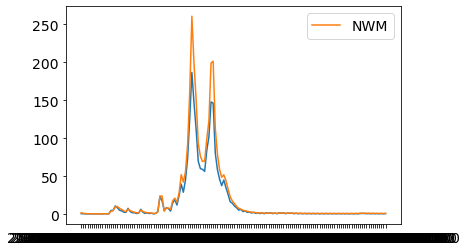

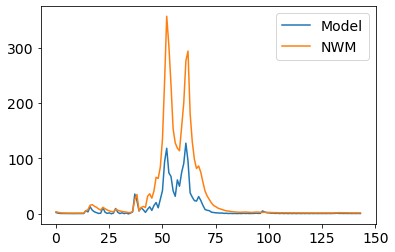

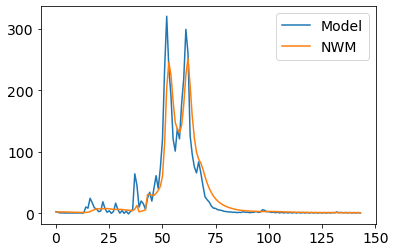

In [147]:
# plot the discharge time series
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
plt.figure(facecolor='white')
plt.plot(time, result[1:,3])
plt.plot(df_nwm['Outflow1'],label = 'NWM')
date_form = DateFormatter("%b %d")
plt.legend()


plt.figure(facecolor = 'white')
plt.plot(result[1:,4],label = 'Model')
plt.plot(df_nwm['Outflow2'],label = 'NWM')
plt.legend()
plt.figure(facecolor = 'white')
plt.plot(result[1:,5],label = 'Model')
plt.plot(df_nwm['Outflow3'],label = 'NWM')
plt.legend()
# # plt.rc('font', size=14)
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.plot(result[:,3], time, color='tab:blue', label='Q')

In [176]:
#Load the sensor data and model data

sensor = pd.read_csv('D:/Sujana/Project/ce397/DD6_sensor.csv')
Y = np.array(sensor['DD6_discharge'])
X = pd.read_csv('D:/Sujana/Project/ce397/result_outflow_kalman.csv')
I1 = np.array(X['I1'])
I2 = np.array(X['I2'])
I3 = np.array(X['I3'])
O1 = np.array(X['O1'])
O2 = np.array(X['O2'])
O3 = np.array(X['O3'])
C = np.array([1/4,0,0,3/4,0,0]).reshape(1,6)

#Define noise parameters
sigma_v = 0.05         # Measurement noise std. dev
sigma_w = 0.5          # Process noise std. dev
add_v = 0               # Add measurement noise by setting to 1
add_w = 0               # Add process noise by setting to 1

#Generate y_hat values
# for i in range(len(I1)):
#     x_h = np.array([[I1[i]],[I2[i]],[I3[i]],[O1[i]],[O2[i]],[O3[i]]])
#     value = C@x_h.reshape(6,1)
#     y_hat = np.concatenate((result,val),axis=0)
# y_hat += add_v * sigma_v * np.random.randn(*y_hat.shape)





Kalman Filter

In [149]:
A = np.block([[B_I,X_I],[B_O,X_O]])
B = np.block([[P_I],[P_O]])
V = sigma_v**2 * np.eye(len(C))    # Measurement noise covariance
W = sigma_w**2 * np.eye(len(A))    # Process noise covariance
S = 1e-2 * np.eye(len(A))          # Initial estimate of error covariance
x_hat = np.zeros(6).reshape(1,6)   # Estimate of initial state
# X_hat = [x_hat]


for k in range(len(I1)):
    y = Y[k]
    u = np.array([[P1[k]],[P2[k]],[P3[k]]])
    # u += add_w * sigma_w * np.random.randn(B.shape[1])
    S = A @ (S - S @ C.T @ np.linalg.inv(C @ S @ C.T + V) @ C @ S) @ A.T + W
    L =  S @ C.T @ np.linalg.inv(C @ S @ C.T + V)
    y_hat = C @ (A @ x_hat[-1,:].reshape(6,1) + B @ u)
    x = A @ x_hat[-1,:].reshape(6,1) + B @ u + L @ (y - y_hat)
    x = x.reshape(1,6)
    x_hat = np.concatenate((x_hat,x),axis=0)
X_hat = x_hat
# X_hat = np.vstack(X_hat)

# for idx in range(len(P1)):   # running till the length of P1 i.e. the number of time steps
#     P_t = np.array([[P1[idx]],[P2[idx]],[P3[idx]]])   # extracting value of each arrary for each time step
#     val = mat_6x6@result[-1,:].reshape(6,1)+mat_6x3@P_t    # selecting the last value of result and reshaping it to 6x1
#     val = val.reshape(1,6)
#     result = np.concatenate((result,val),axis=0)

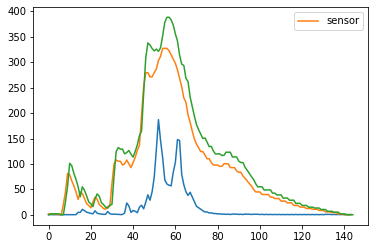

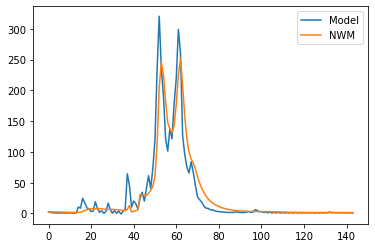

In [124]:
# plot the discharge time series
# Outflow1
plt.figure(facecolor='white')
plt.plot(O1)
plt.plot(Y, label = 'sensor')
plt.plot(X_hat[:,3])
# plt.plot(df_nwm['Outflow1'],label = 'NWM')
date_form = DateFormatter("%b %d")
plt.legend()

# Outflow3
plt.figure(facecolor = 'white')
plt.plot(result[1:,5],label = 'Model')
plt.plot(df_nwm['Outflow3'],label = 'NWM')
plt.legend()
# # plt.rc('font', size=14)
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.plot(result[:,3], time, color='tab:blue', label='Q')

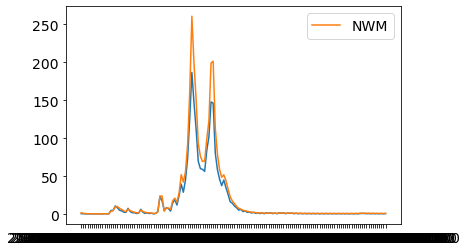

In [159]:
# plot the discharge time series
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
plt.figure(facecolor='white')
plt.plot(time, result[1:,3])
plt.plot(df_nwm['Outflow1'],label = 'NWM')
date_form = DateFormatter("%b %d")
ax.xaxis.set_major_formatter(date_form)
plt.legend()

<Figure size 432x288 with 0 Axes>

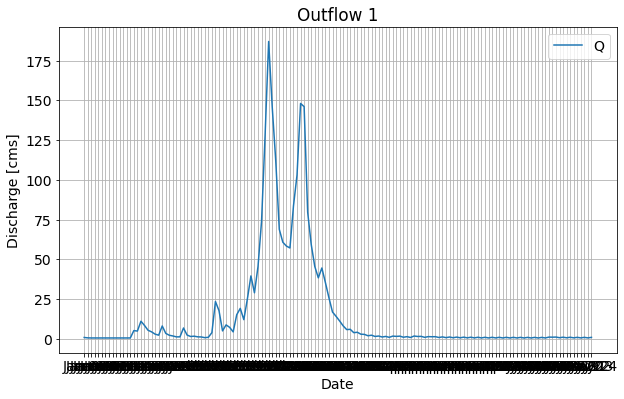

In [186]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

plt.figure(facecolor='white')
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(X['O1'], color='tab:blue', label='Q')
# ax.line(X.index.values,
#        X['O1'],
#        color='purple')
ax.set(xlabel='Date',
       ylabel='Discharge [cms]',
       title='Outflow 1')
date_form = DateFormatter("%b %d")
ax.xaxis.set_major_formatter(date_form)
ax.legend()
ax.grid(True)
plt.show()

In [ ]:
X = X.set_index('Time')

In [174]:
m = 

pandas.core.frame.DataFrame

In [181]:
type(X.index.values)

numpy.ndarray